In [ ]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in colab or kaggle
!wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2023/main/tools/vector_fields.py

In [1]:
import sympy
from sympy import sin
from sympy.utilities import lambdify
import numpy as np
import matplotlib.pyplot as plt
import vector_fields 
import ipywidgets as widgets

# Das mathematische Pendel

In [2]:
(t,x,y) = sympy.var("t x y")

Das mathematische Pendel lässt sich durch die Differentialgleichung zweiter Ordnung

\begin{align*}\ddot x = -k\sin(x)\end{align*}

beschreiben. Dabei ist der Parameter $k = \frac{g}{\ell}$, wobei $\ell$ die Länge des Pendels und $g$
die Fallbeschleunigung ist. Im Folgenden werden wir $k$ in der Regel auf $1$ setzen.

Lösungen dieser Differentialgleichung sind Funktionen der Form $I \to \mathbb{R}$ für ein Intervall $I$. 


In [3]:
k = 1
f = sympy.Matrix([y,-k*sin(x)])

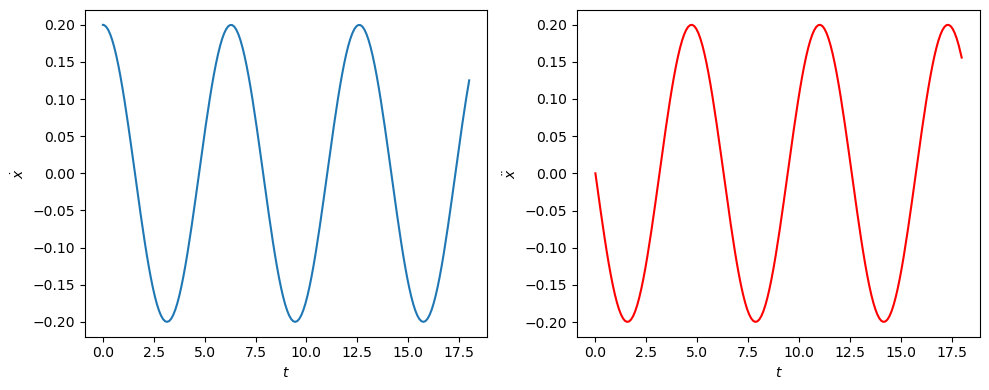

In [4]:
fig = vector_fields.plot_solution_pair(f,(x,y));
fig.set_figwidth(10)
fig.set_figheight(4)
fig.axes[0].set_xlabel("$t$")
fig.axes[1].set_xlabel("$t$")
fig.axes[0].set_ylabel("$\dot x$")
fig.axes[1].set_ylabel("$\ddot x$")
fig.tight_layout()
plt.show()

## Differentialgleichungssystem und Vektorfeld

Setzen wir $y=\dot x$, so erhalten wir
das 2-dimensionale Differentialgleichungssystem
\begin{align*}\dot x &= y,\\ \dot y &= -k\sin(x).\end{align*}

Die Abbildung $\mathbb{R} \mapsto \mathbb{R},\; \begin{pmatrix}x \\ y\end{pmatrix} \mapsto \begin{pmatrix} y \\ -k\sin(x)\end{pmatrix}$ definiert ein Vektorfeld.

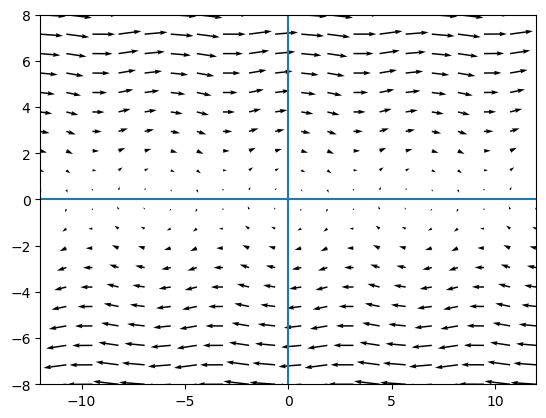

In [5]:
vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8))
plt.show()

## Einige Lösungskurven

Lösungen des obigen Differentialgleichungssystems sind Kurven im $\mathbb{R}^2$, also Abbildungen der Form $I \to \mathbb{R}^2$ für ein Intervall $I$. Die folgende Abbildung zeigt die **Bilder** einiger dieser Kurven.

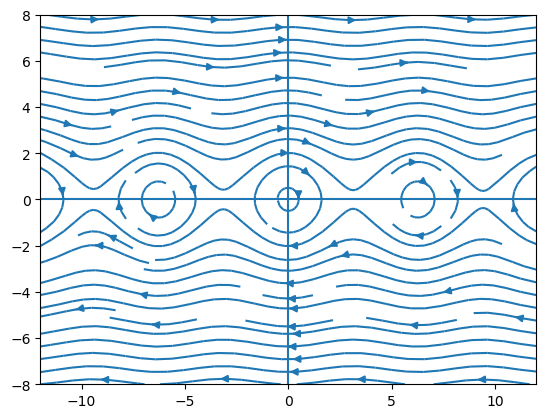

In [6]:
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8))
plt.show()

Die Lösungskurven sind tangential zum Vektorfeld.

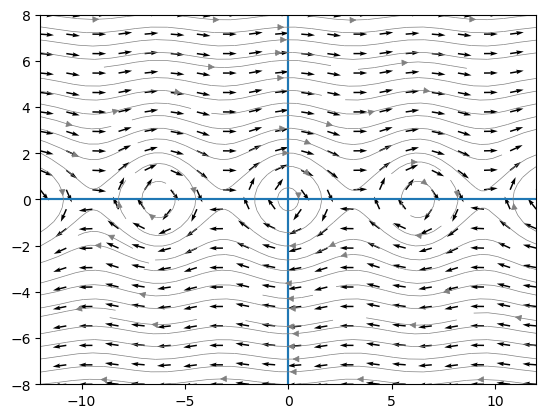

In [7]:
ax = vector_fields.plot_vector_field(f/vector_fields.norm(f),(x,-12,12),(y,-8,8),color="black")
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=ax,color="grey",linewidth=0.5)
plt.show()

## Eine spezielle Lösung

Wir bestimmen nun numerisch eine Lösung der Differentialgleichung für die $x(0)=2.2, y(0)=0$ gilt.

Das Bild der Lösungskurve stellen wir nun zusammen mit dem Vektorfeld dar.

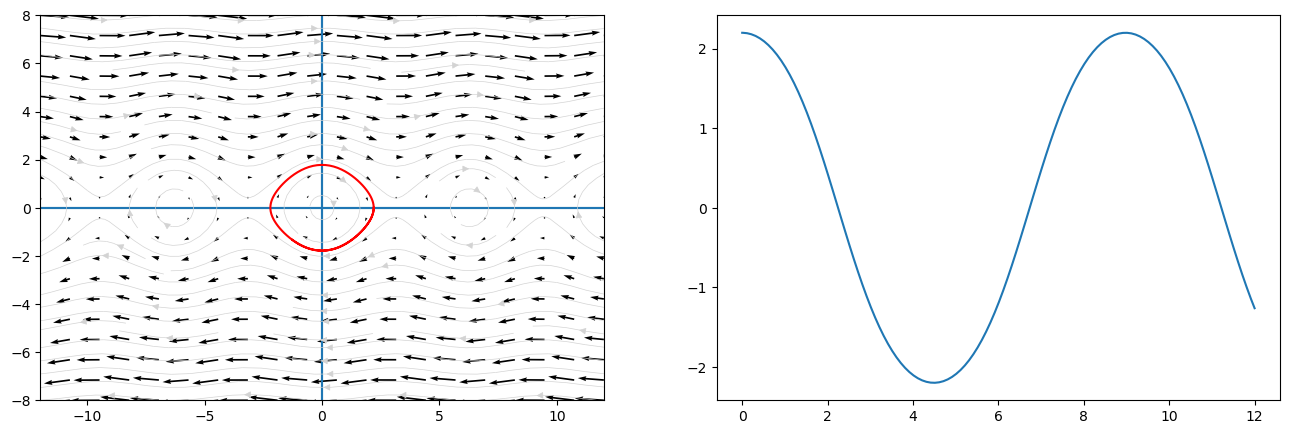

In [8]:
def plot_solution(f, initial_value, t_1=12):
    solution = vector_fields.solve_ivp(f,(x,y),(0,t_1),initial_value)
    fig = plt.figure()
    axis = fig.subplots(1,2)
    vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8),ax=axis[0],color="black")
    vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=axis[0],color="lightgrey",linewidth=0.5)
    axis[0].plot(solution.y[0,:],solution.y[1,:],color="red")
    axis[1].plot(solution.t,solution.y[0,:])
    fig.set_figwidth(16)
    fig.set_figheight(5)
    return fig

plot_solution(f, (2.2,0))
plt.show()

## Linearisierung

Die Taylorentwicklung von $\sin(x)$ in $0$ ergibt sich wie folgt:

In [9]:
sympy.series(sin(x),x,0,10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

Für kleine Auslenkungen $x$ können wir unsere Differentialgleichung also approximieren durch $\ddot x = -kx$,
oder als System ausgedrückt, 
\begin{align*}\dot x &= y,\\ \dot y &= -kx.\end{align*}
Dieses System nennt man auch den *harmonischen Oszillator*.

Für kleine Auslenkungen sind die Lösungen noch sehr ähnlich:

In [10]:
g = sympy.Matrix([y,-k*x])

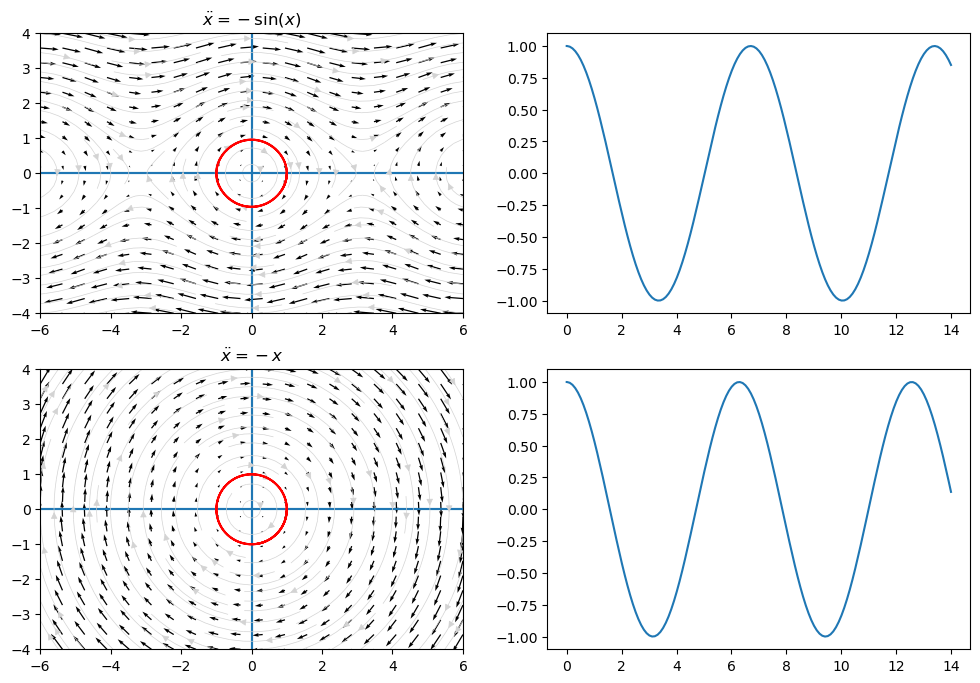

In [11]:
def plot_solution_with_approximation(initial_value, approximation):
    fig = plt.figure()
    axis = fig.subplots(2,2)
    solution = vector_fields.solve_ivp(f,(x,y),(0,14),initial_value)
    linearized_solution = vector_fields.solve_ivp(approximation,(x,y),(0,14),initial_value)

    vector_fields.plot_vector_field(f,(x,-6,6),(y,-4,4),ax=axis[0,0],color="black")
    vector_fields.plot_streamlines(f,(x,-6,6),(y,-4,4),ax=axis[0,0],color="lightgrey",linewidth=0.5)
    axis[0,0].plot(solution.y[0,:],solution.y[1,:],color="red")
    axis[0,0].set_title("$\ddot x = - \sin(x)$")
    axis[0,1].plot(solution.t,solution.y[0,:])

    vector_fields.plot_vector_field(approximation,(x,-6,6),(y,-4,4),ax=axis[1,0],color="black")
    vector_fields.plot_streamlines(approximation,(x,-6,6),(y,-4,4),ax=axis[1,0],color="lightgrey",linewidth=0.5)
    axis[1,0].plot(linearized_solution.y[0,:],linearized_solution.y[1,:],color="red")
    axis[1,0].set_title(f"$\ddot x = {sympy.latex(approximation[1])}$")
    axis[1,1].plot(linearized_solution.t,linearized_solution.y[0,:])

    fig.set_figwidth(12)
    fig.set_figheight(8)
    return fig

plot_solution_with_approximation((1,0),g)
plt.show()


Für größere Auslenkungen sind die Lösungen deutlich verschieden:

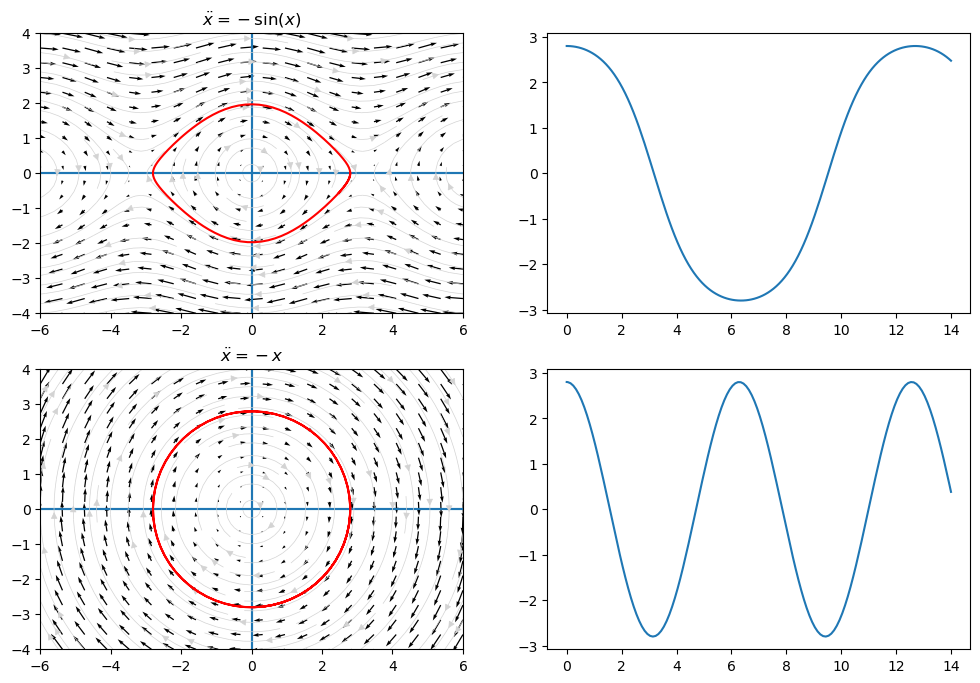

In [12]:
plot_solution_with_approximation((2.8,0),g)
plt.show()


## Approximationen

Nimmt man eine bessere Approximation der Sinusfunktion in $0$, dann ähneln sich die Lösungen auch für größere Auslenkungen.

In [13]:
sin_approx = sympy.series(sin(x),x,0,10).removeO()

In [14]:
h = sympy.Matrix([y,-k*sin_approx])

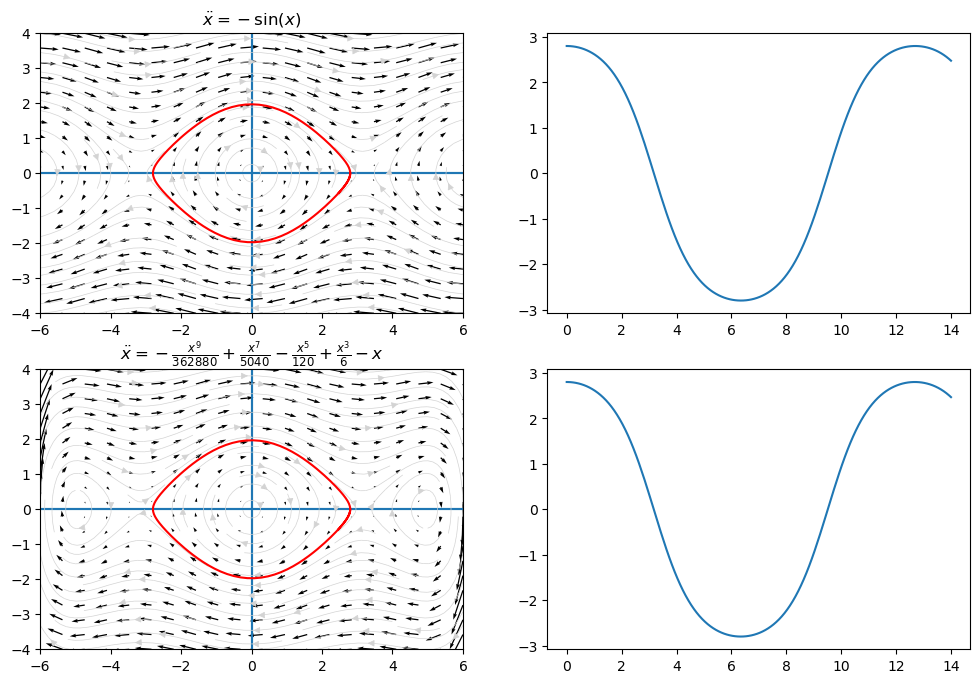

In [15]:
plot_solution_with_approximation((2.8,0),h)
plt.show()

## Reibung

Eine Möglichkeit, die Reibung zu berücksichtigen, ist folgende Differentialgleichung:
\begin{align*}\ddot x = -k\sin(x)-c\dot{x}.\end{align*}.

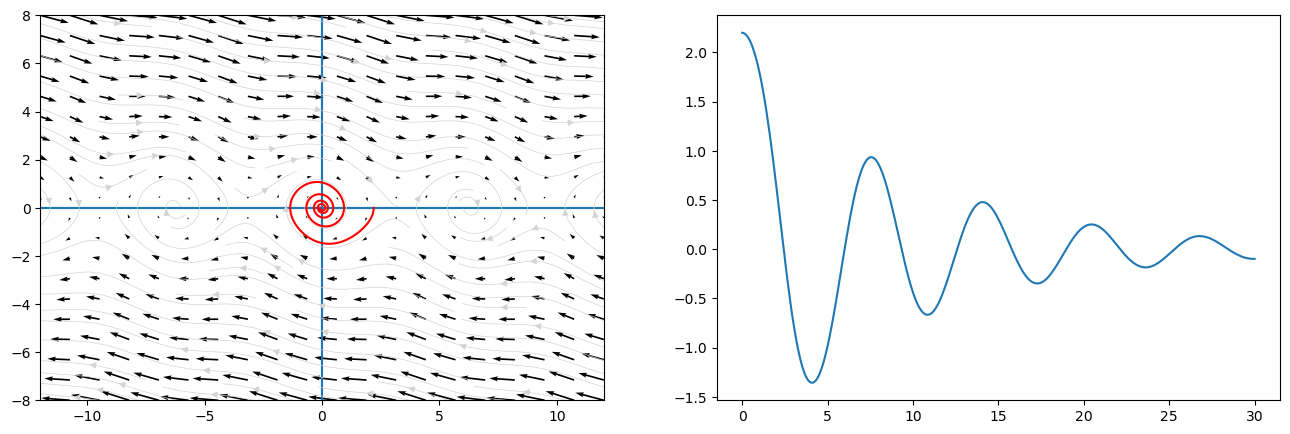

In [16]:
k = 1
c = 0.2
f2 = sympy.Matrix([y,-k*sin(x) - c*y])
plot_solution(f2,(2.2,0),30)
plt.show()

## Periodische Anregung

Fügt man jetzt noch eine periodische Anregung hinzu, erhält man eine nicht-autonome Differentialgleichung:

\begin{align*}\ddot x = -k\sin(x)+c\dot x+d \sin(t).\end{align*}.

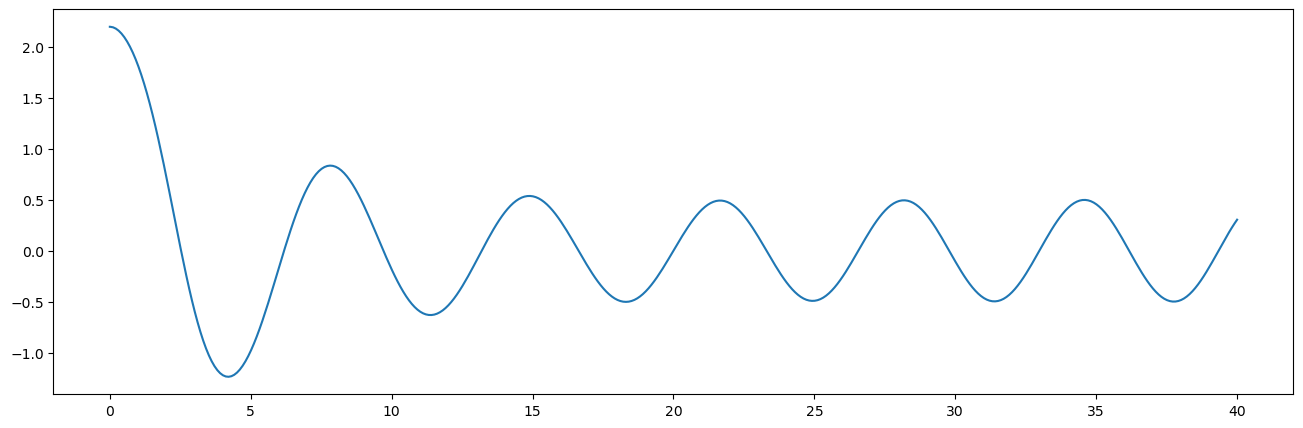

In [19]:
def plot_solution_non_autonomous(f, initial_value, t_1=12):
    solution = vector_fields.solve_non_autonomous_ivp(f,t,(x,y),(0,t_1),initial_value)
    fig = plt.figure()
    ax = fig.subplots(1,1)
    ax.plot(solution.t,solution.y[0,:])
    fig.set_figwidth(16)
    fig.set_figheight(5)
    return fig

k = 1
c = 0.2
f3 = sympy.Matrix([y,-k*sin(x)-0.2*y+0.1*sin(t)])
plot_solution_non_autonomous(f3,(2.2,0),40)
plt.show()